In [154]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_top10 = pd.read_csv('netflix daily top 10.csv')

df_titles = pd.read_csv('netflix_titles.csv')

In [157]:
df_titles.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [158]:
df_titles
duplicates = df_titles[df_titles.duplicated()]
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


In [159]:
df_top10.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [160]:
df_top10 = df_top10.loc[:, ['Title']].drop_duplicates()

In [161]:
df_full = pd.merge(df_titles,df_top10, how='left',left_on= "title", right_on="Title")

In [162]:
df_full[df_full['title']== 'Ozark']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title
2767,s2768,TV Show,Ozark,NaN,"Jason Bateman, Sofia Hublitz, Laura Linney, Sk...",United States,"March 27, 2020",2020,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A financial adviser drags his family from Chic...,Ozark


In [163]:
df_full['Title'] = df_full['Title'].notna().astype(int)
df_full.rename(columns={'Title': 'top10_flag'}, inplace=True)
df_full

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,top10_flag
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",0


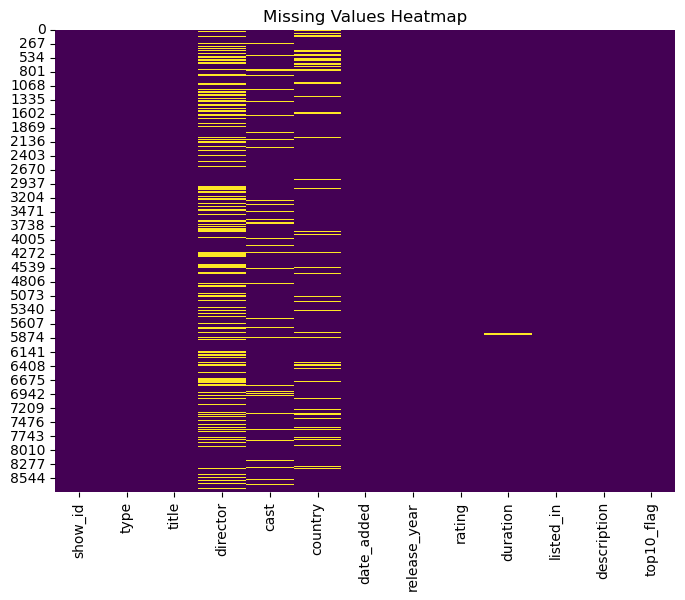

In [164]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_full.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [165]:
print(df_full['type'].unique())
print(df_full['rating'].unique())
print(df_full['duration'].unique())


['Movie' 'TV Show']
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '18

In [166]:
print(df_full['listed_in'].unique())
df_full.head(5)

['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, International TV Shows, Reality TV'
 'Comedies, International Movies, Music & 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,top10_flag
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0


In [167]:
## Steps to fix data

#drop showid, director,cast, country
features = df_full.drop(['show_id','title', 'director', 'cast', 'country', 'description','date_added'], axis=1, inplace=True)

#drop row where duration is null
df_full.dropna(subset=['duration'], inplace=True)



In [168]:
# Extract numerical values and units into separate columns
df_full['duration_minutes'] = df_full['duration'].str.extract(r'(\d+) min', expand=False).astype(float)
df_full['duration_seasons'] = df_full['duration'].str.extract(r'(\d+) Season[s]?', expand=False).astype(float)

# Fill NaN values in case there are no seasons or minutes mentioned
df_full['duration_minutes'].fillna(0, inplace=True)
df_full['duration_seasons'].fillna(0, inplace=True)

# Drop the original 'duration' column
df_full.drop(columns=['duration'], inplace=True)
df_full

,type,release_year,rating,listed_in,top10_flag,duration_minutes,duration_seasons
0,Movie,2020,PG-13,Documentaries,0,90.0,0.0
1,TV Show,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",0,0.0,2.0
2,TV Show,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",0,0.0,1.0
3,TV Show,2021,TV-MA,"Docuseries, Reality TV",0,0.0,1.0
4,TV Show,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",0,0.0,2.0
...,...,...,...,...,...,...,...
8802,Movie,2007,R,"Cult Movies, Dramas, Thrillers",0,158.0,0.0
8803,TV Show,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies",0,0.0,2.0
8804,Movie,2009,R,"Comedies, Horror Movies",0,88.0,0.0
8805,Movie,2006,PG,"Children & Family Movies, Comedies",0,88.0,0.0


In [169]:
df_full['duration_seasons'].unique()

array([ 0.,  2.,  1.,  9.,  4.,  5.,  3.,  6.,  7., 10.,  8., 17., 13.,
       15., 12., 11.])

In [170]:
# Splitting the genres into separate columns at commas
genres_split = df_full['listed_in'].str.split(', ', expand=True)

# Creating binary columns for each unique value
genres_dummies = pd.get_dummies(genres_split.stack()).sum(level=0)

# Concatenating the binary columns with the original DataFrame
df_full = pd.concat([df_full, genres_dummies], axis=1)

# Drop Listed in
df_full.drop('listed_in', axis=1, inplace=True)

#
df_full

C:\Users\gabrielcar\Anaconda3\envs\nlp_hw3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """


,type,release_year,rating,top10_flag,duration_minutes,duration_seasons,Action & Adventure,Anime Features,Anime Series,British TV Shows,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,Movie,2020,PG-13,0,90.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TV Show,2021,TV-MA,0,0.0,2.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,TV Show,2021,TV-MA,0,0.0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,TV Show,2021,TV-MA,0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,2021,TV-MA,0,0.0,2.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,2007,R,0,158.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8803,TV Show,2018,TV-Y7,0,0.0,2.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8804,Movie,2009,R,0,88.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,Movie,2006,PG,0,88.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df_full

,type,release_year,rating,top10_flag,duration_minutes,duration_seasons,Action & Adventure,Anime Features,Anime Series,British TV Shows,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,Movie,2020,PG-13,0,90.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TV Show,2021,TV-MA,0,0.0,2.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,TV Show,2021,TV-MA,0,0.0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,TV Show,2021,TV-MA,0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,2021,TV-MA,0,0.0,2.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,2007,R,0,158.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8803,TV Show,2018,TV-Y7,0,0.0,2.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8804,Movie,2009,R,0,88.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,Movie,2006,PG,0,88.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
#one-hot encoding
df_encoded = pd.get_dummies(df_full)
df_encoded

,release_year,top10_flag,duration_minutes,duration_seasons,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,2020,0,90.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2021,0,0.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2021,0,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2021,0,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2021,0,0.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,2007,0,158.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8803,2018,0,0.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8804,2009,0,88.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8805,2006,0,88.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
#Correlation Matrix
correlation_matrix = df_encoded.corr()
correlation_matrix

,release_year,top10_flag,duration_minutes,duration_seasons,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
release_year,1.000000,0.095773,-0.248050,0.100104,-0.173025,-0.030639,0.013550,0.034409,-0.011129,-0.067482,...,-0.133933,-0.132833,-0.033920,0.028409,0.212959,-0.024321,0.064207,0.029915,0.001934,-0.031078
top10_flag,0.095773,1.000000,-0.052573,0.092954,0.041325,-0.019979,-0.020119,0.010173,0.024845,0.006588,...,0.047080,0.064794,-0.045096,0.023100,-0.001204,-0.026019,-0.033322,-0.013034,-0.005786,-0.004091
duration_minutes,-0.248050,-0.052573,1.000000,-0.605548,0.282103,0.041358,-0.192125,-0.231385,0.057789,-0.075982,...,0.183851,0.227745,0.039318,-0.073585,-0.112479,-0.063721,-0.179952,-0.160804,-0.006239,0.013266
duration_seasons,0.100104,0.092954,-0.605548,1.000000,-0.148018,-0.040589,0.124330,0.185001,-0.126145,0.243725,...,-0.109285,-0.141556,0.039039,0.034182,0.041508,0.024372,0.083807,0.107175,-0.004451,-0.008311
Action & Adventure,-0.173025,0.041325,0.282103,-0.148018,1.000000,0.184343,-0.046962,-0.056559,-0.053836,-0.018573,...,0.167287,0.189278,0.002002,-0.052640,-0.089014,-0.065915,-0.062501,-0.065295,0.006081,0.014669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rating_TV-PG,-0.024321,-0.026019,-0.063721,0.024372,-0.065915,0.051424,-0.000688,0.069052,0.032590,0.022085,...,-0.080031,-0.104150,-0.187966,-0.052776,-0.249540,1.000000,-0.062662,-0.065464,-0.008609,-0.006086
rating_TV-Y,0.064207,-0.033322,-0.179952,0.083807,-0.062501,-0.017139,-0.018301,0.041425,0.216014,0.000260,...,-0.046146,-0.060052,-0.108380,-0.030430,-0.143883,-0.062662,1.000000,-0.037746,-0.004964,-0.003509
rating_TV-Y7,0.029915,-0.013034,-0.160804,0.107175,-0.065295,0.008685,0.082078,-0.016364,0.239543,-0.000657,...,-0.048209,-0.062737,-0.113225,-0.031791,-0.150315,-0.065464,-0.037746,1.000000,-0.005186,-0.003666
rating_TV-Y7-FV,0.001934,-0.005786,-0.006239,-0.004451,0.006081,-0.002355,-0.003730,-0.004492,0.076441,-0.001475,...,-0.006340,-0.008250,-0.014890,-0.004181,-0.019768,-0.008609,-0.004964,-0.005186,1.000000,-0.000482


In [177]:
from imblearn.over_sampling import SMOTE

#Assuming you have a DataFrame 'df' with features and target variable
# X contains features, y contains target variable
X = df_encoded.drop('top10_flag', axis=1)
y = df_encoded['top10_flag']

# Apply SMOTE to the feature matrix and target vector
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to pandas DataFrame and Series
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='top10_flag')

In [179]:
#Model buiilding
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



# 1. Logistic Regression
log_reg_model = LogisticRegression()
log_reg_scores = cross_val_score(log_reg_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Logistic Regression Cross Validation Scores:", log_reg_scores)
print("Mean Accuracy:", np.mean(log_reg_scores))


C:\Users\gabrielcar\Anaconda3\envs\nlp_hw3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\gabrielcar\Anaconda3\envs\nlp_hw3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Logistic Regression Cross Validation Scores: [0.81322609 0.88322907 0.87310098 0.85969616 0.85429082]
Mean Accuracy: 0.856708626203301


C:\Users\gabrielcar\Anaconda3\envs\nlp_hw3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\gabrielcar\Anaconda3\envs\nlp_hw3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

In [180]:
log_reg_model.fit(X_resampled,y_resampled)
coefficients = log_reg_model.coef_[0]

# Get the intercept
intercept = log_reg_model.intercept_[0]

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 6.10116006e-04  3.87337001e-02 -1.83146327e-02 -1.41063534e+00
 -2.78513226e-01 -7.98586896e-01 -5.41491251e-01 -1.82460196e+00
 -2.06917182e-01 -5.74405097e-01 -1.40542955e+00  1.93113061e-01
 -4.68886711e-01 -2.98663735e+00 -2.15842793e-01 -1.83291398e+00
 -1.39230812e-01 -1.39854918e+00 -2.06618508e+00 -4.33986640e+00
 -2.63511718e+00 -2.76031018e+00 -6.24315878e-01 -3.52621829e-01
 -3.52402828e-01 -1.19530399e+00  5.70855335e-02 -1.06432236e+00
 -8.31710456e-01 -1.30275063e+00 -3.69522516e-01 -2.66123985e-01
 -7.53090321e-01 -1.97337115e+00 -3.71922712e-01  5.37143646e-01
 -9.69039479e-02  1.20053802e+00 -2.79991479e-01  2.29924421e-01
  8.99613838e-02 -1.11243013e-01 -2.80497514e-01 -1.89370211e-02
 -1.09323682e+00 -1.75568756e+00  1.53011982e+00 -2.90263022e-01
 -1.19133397e-02 -3.83206479e-01 -7.54006721e-01 -1.13855030e+00
 -1.27238222e+00 -1.99870028e+00 -7.97415157e-01 -1.02471491e+00
 -2.64726221e+00 -1.97263421e+00 -1.88758767e+00 -4.36874581e-02
 -1.2733697

C:\Users\gabrielcar\Anaconda3\envs\nlp_hw3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [182]:
equation = "log(p / (1 - p)) = "
for i in range(len(coefficients)):
    if i == 0:
        equation += f"{intercept:.4f}"
    else:
        if coefficients[i] >= 0:
            equation += f" + {coefficients[i]:.4f} * x{i}"
        else:
            equation += f" - {-coefficients[i]:.4f} * x{i}"

print("Logistic Regression Equation:")
print(equation)

Logistic Regression Equation:
log(p / (1 - p)) = -0.0842 + 0.0387 * x1 - 0.0183 * x2 - 1.4106 * x3 - 0.2785 * x4 - 0.7986 * x5 - 0.5415 * x6 - 1.8246 * x7 - 0.2069 * x8 - 0.5744 * x9 - 1.4054 * x10 + 0.1931 * x11 - 0.4689 * x12 - 2.9866 * x13 - 0.2158 * x14 - 1.8329 * x15 - 0.1392 * x16 - 1.3985 * x17 - 2.0662 * x18 - 4.3399 * x19 - 2.6351 * x20 - 2.7603 * x21 - 0.6243 * x22 - 0.3526 * x23 - 0.3524 * x24 - 1.1953 * x25 + 0.0571 * x26 - 1.0643 * x27 - 0.8317 * x28 - 1.3028 * x29 - 0.3695 * x30 - 0.2661 * x31 - 0.7531 * x32 - 1.9734 * x33 - 0.3719 * x34 + 0.5371 * x35 - 0.0969 * x36 + 1.2005 * x37 - 0.2800 * x38 + 0.2299 * x39 + 0.0900 * x40 - 0.1112 * x41 - 0.2805 * x42 - 0.0189 * x43 - 1.0932 * x44 - 1.7557 * x45 + 1.5301 * x46 - 0.2903 * x47 - 0.0119 * x48 - 0.3832 * x49 - 0.7540 * x50 - 1.1386 * x51 - 1.2724 * x52 - 1.9987 * x53 - 0.7974 * x54 - 1.0247 * x55 - 2.6473 * x56 - 1.9726 * x57 - 1.8876 * x58 - 0.0437 * x59 - 0.0127 * x60


In [181]:
df_encoded.to_csv('df_encoded.csv', index=False)